# Fundamentos de Machine Learning

In [1]:
#importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Carregando o DataSet

data = pd.read_csv("dataframe_8.csv")

In [3]:
data.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [4]:
data.shape

(2460, 5)

In [5]:
data.describe()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.080488,16.032527,64.945933,5.093089,177.607724
std,1.423109,10.466474,23.551127,2.827254,119.851061
min,1.000000,0.014848,0.644731,1.000000,0.000000
25%,2.000000,7.093529,47.604707,3.000000,77.000000
50%,3.000000,14.843907,68.809210,5.000000,157.000000
75%,4.000000,23.669780,84.670920,7.000000,265.000000
max,5.000000,45.147573,99.997355,10.000000,529.000000


In [6]:
data.dtypes

ind_pop_cid    float64
perc_pol       float64
taxa_crim      float64
nivel_ed       float64
crimes           int64
dtype: object

Exercício 1

In [7]:
def train_test(df, perc):
    data_2 = df.copy()
    a = len(data_2)
    data_2 = data_2.sample(a)
    x = int(a * perc)
    test = data_2[:x]
    train = data_2[x:]
    
    return train, test

In [8]:
train, test = train_test(data, 0.25)

In [9]:
train

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
2284,2.0,28.079705,98.307829,5.0,254
625,1.0,12.918665,58.628589,1.0,268
1267,5.0,31.874844,82.071695,8.0,109
145,2.0,29.890994,81.955525,6.0,56
300,3.0,23.121518,89.003271,4.0,282
...,...,...,...,...,...
574,2.0,5.333006,37.363579,10.0,14
1215,4.0,14.519621,71.118735,10.0,195
1306,2.0,11.090845,42.962081,7.0,108
270,5.0,22.162693,97.360080,8.0,350


In [10]:
test

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
2345,2.0,9.527007,97.187884,3.0,402
1987,5.0,17.671092,58.724209,6.0,138
154,5.0,6.070993,64.016325,6.0,212
1118,1.0,8.776198,73.410296,5.0,220
1242,2.0,30.676975,70.772537,4.0,76
...,...,...,...,...,...
540,5.0,25.939994,54.280290,5.0,41
133,3.0,37.534046,78.878698,1.0,76
994,5.0,5.082162,59.333295,8.0,238
474,4.0,3.203519,5.974151,1.0,32


Exercício 2

In [11]:
data.corr()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
ind_pop_cid,1.000000,0.016876,-0.072930,-0.000852,0.067237
perc_pol,0.016876,1.000000,0.399212,-0.055423,-0.377929
taxa_crim,-0.072930,0.399212,1.000000,0.097896,0.578659
nivel_ed,-0.000852,-0.055423,0.097896,1.000000,-0.200762
crimes,0.067237,-0.377929,0.578659,-0.200762,1.000000


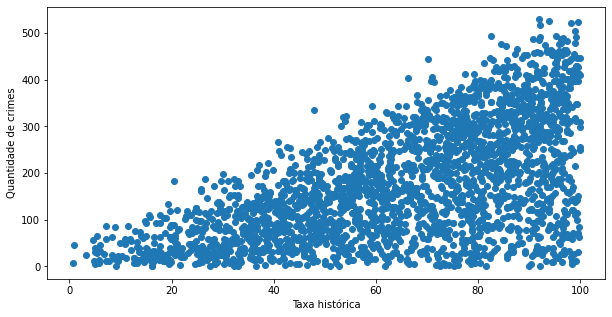

In [12]:
plt.figure(figsize=[10,5])
plt.scatter( data.taxa_crim, data.crimes)
plt.xlabel('Taxa histórica')
plt.ylabel('Quantidade de crimes')

plt.show()

A variável escolhida para prever a Target (Crimes), foi a variável 'taxa_crim' pois ela representou maior correlação com a Target (0.578659). Também podemos observar graficamente que na medida que uma aumenta, a outra também aumenta.

In [13]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [14]:
lin_reg = LinearRegression()

In [15]:
X_train = train['taxa_crim']
type(X_train), X_train

(pandas.core.series.Series,
 2284    98.307829
 625     58.628589
 1267    82.071695
 145     81.955525
 300     89.003271
           ...    
 574     37.363579
 1215    71.118735
 1306    42.962081
 270     97.360080
 1528    84.979942
 Name: taxa_crim, Length: 1845, dtype: float64)

In [16]:
train['crimes'] = train.crimes.astype(float)

In [17]:
y_train = train['crimes']
type(y_train), y_train

(pandas.core.series.Series,
 2284    254.0
 625     268.0
 1267    109.0
 145      56.0
 300     282.0
         ...  
 574      14.0
 1215    195.0
 1306    108.0
 270     350.0
 1528    354.0
 Name: crimes, Length: 1845, dtype: float64)

In [18]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [19]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [20]:
X_test = test['taxa_crim']

In [21]:
X_test = X_test.values.reshape(-1,1)

In [22]:
y_test = test['crimes']

In [23]:
y_test = y_test.values.reshape(-1,1)

In [24]:
y_pred = lin_reg.predict(X_test)

In [25]:
RMSE(y = y_test, y_pred = y_pred)

98.61291914422831

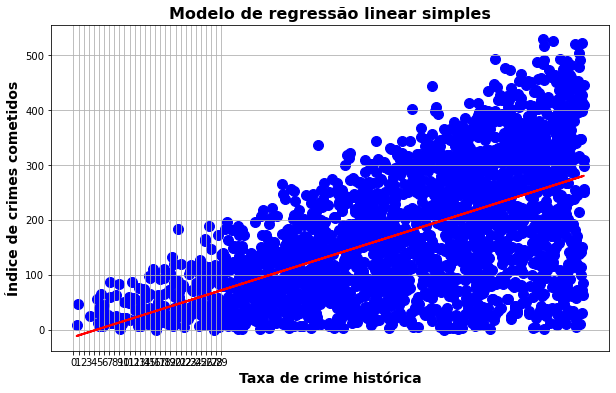

In [26]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'black', fontsize = 16)
plt.scatter(data['taxa_crim'], data['crimes'], s = 100, c = 'blue')
plt.xlabel("Taxa de crime histórica", fontweight = 'bold', fontsize = 14)
plt.ylabel("Índice de crimes cometidos", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))

plt.plot(X_test, y_pred, c = 'red', lw = 2)
plt.grid()

In [27]:
def knn_pred(X_train, y_train, X_test, y_test):
    for i in range(1,15,1):
        knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
        rmse_knn = np.round(RMSE(y = y_test, y_pred = knn.predict(X_test)),2)
        
        plt.figure(figsize=[40,30])
        plt.subplot(7,2,i)
        plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
        plt.plot(X_test, knn.predict(X_test), c = 'black', lw = 2)
        plt.scatter(data['taxa_crim'], data['crimes'], s = 100, c = 'gray')
        plt.grid()
        plt.show()

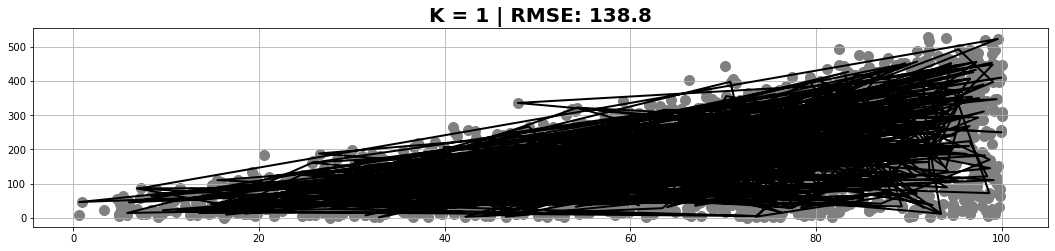

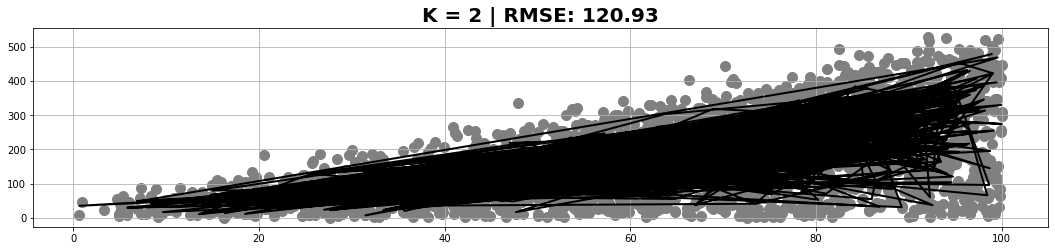

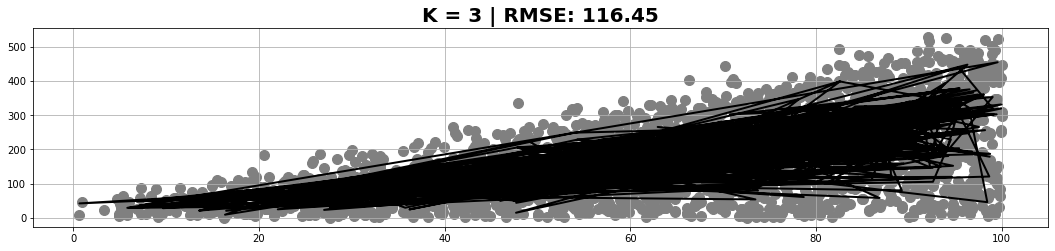

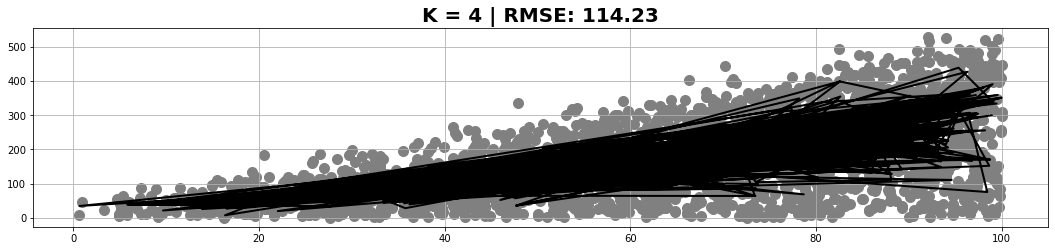

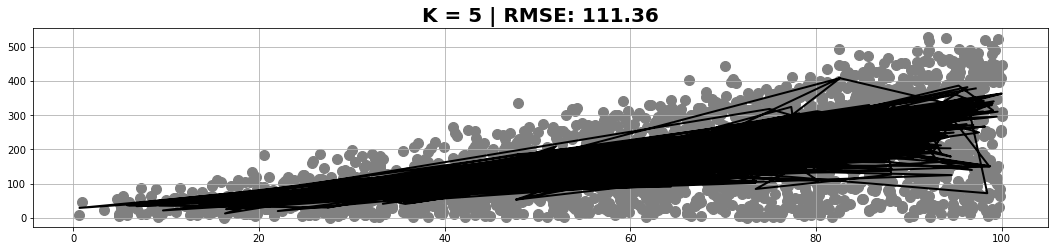

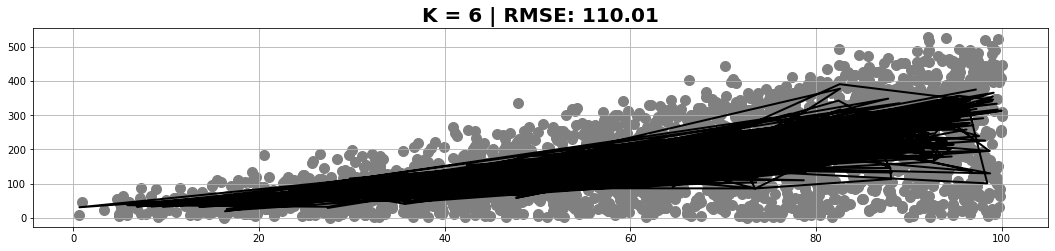

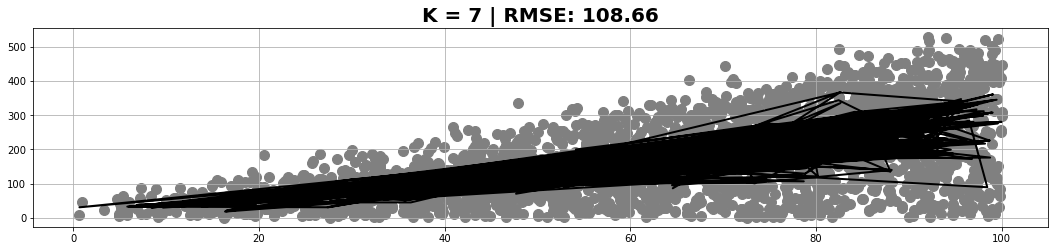

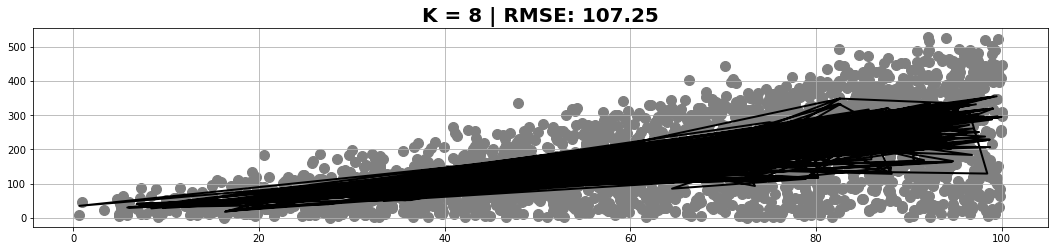

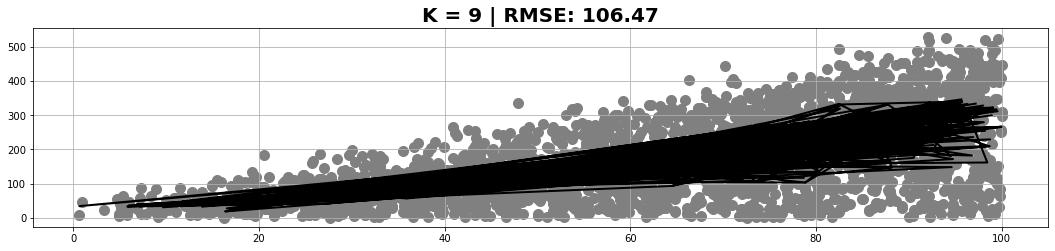

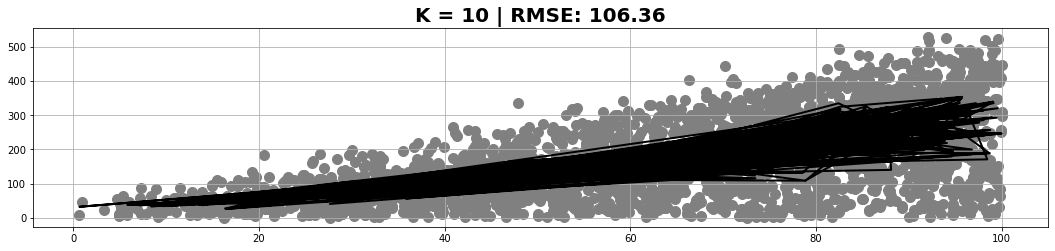

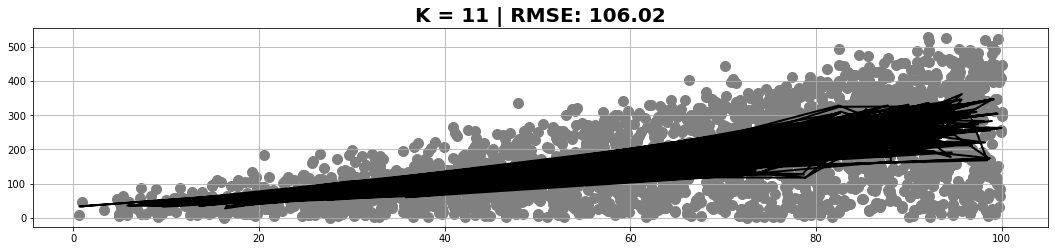

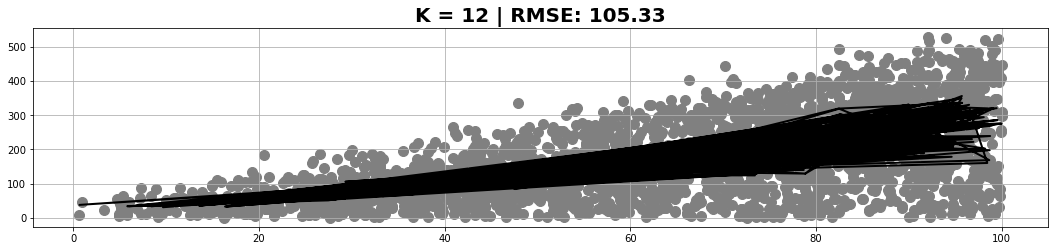

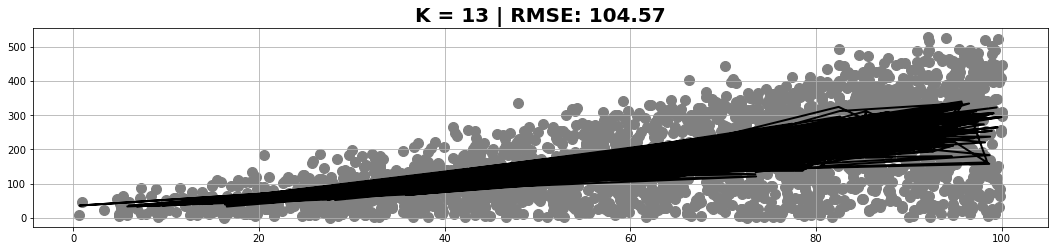

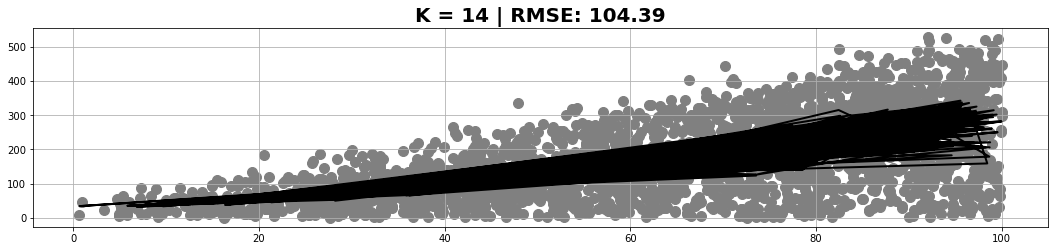

In [28]:
knn_pred(X_train, y_train, X_test, y_test)

Os modelos que sofreram de Overfitting foram os que têm o KNN 1,2 e 3

Refazendo o processo, desta vez com as outras variáveis:

In [53]:
def knn_pred_2(X_train, y_train, X_test, y_test, column):
    for i in range(1,15,1):
        knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
        rmse_knn = np.round(RMSE(y = y_test, y_pred = knn.predict(X_test)),2)
        
        plt.figure(figsize=[40,30])
        plt.subplot(7,2,i)
        plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
        plt.plot(X_test, knn.predict(X_test), c = 'black', lw = 2)
        plt.scatter(data[column], data['crimes'], s = 100, c = 'gray')
        plt.grid()
        plt.show()

In [47]:
def sep_col(df, x_1, x_2, x_3, x_4, x_5):
    df_2 = df.copy()
    x1_column = df_2[x_1].values.reshape(-1,1)
    x2_column = df_2[x_2].values.reshape(-1,1)
    x3_column = df_2[x_3].values.reshape(-1,1)
    x4_column = df_2[x_4].values.reshape(-1,1)
    x5_column = df_2[x_5].values.reshape(-1,1)
    
    return x1_column, x2_column, x3_column, x4_column, x5_column

In [48]:
X_train_indpop, X_train_percpol, X_train_taxacrim, X_train_nivel_ed, y_train = sep_col(train, 'ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed', 'crimes')

In [49]:
X_test_indpop, X_test_percpol, X_test_taxacrim, X_test_nivel_ed, y_test = sep_col(test, 'ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed', 'crimes')

ind_pop_cid:

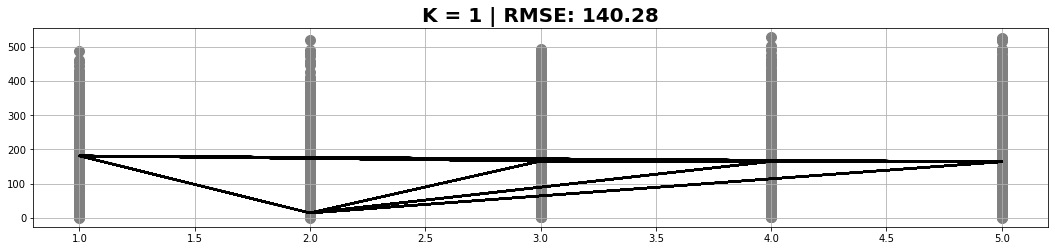

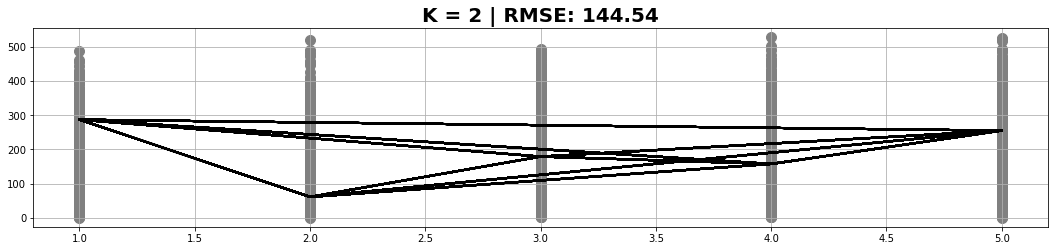

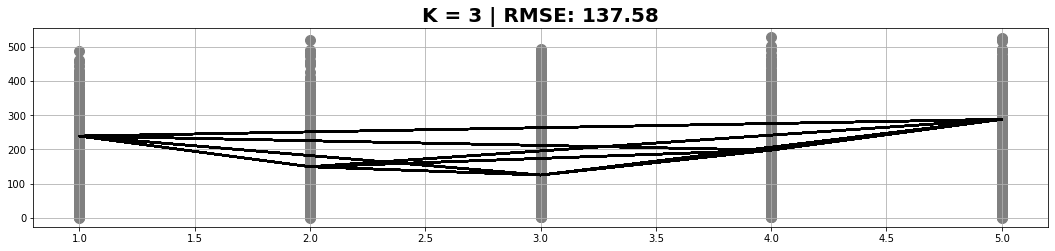

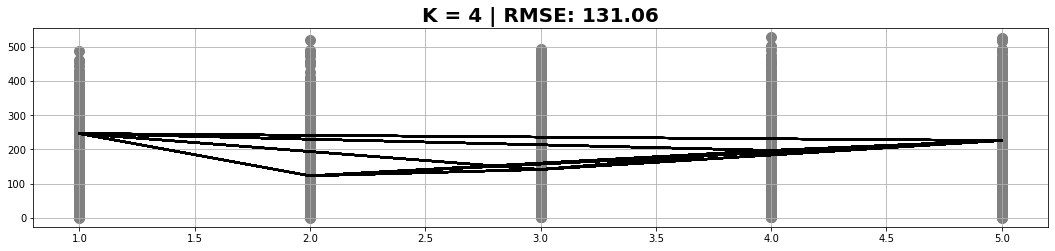

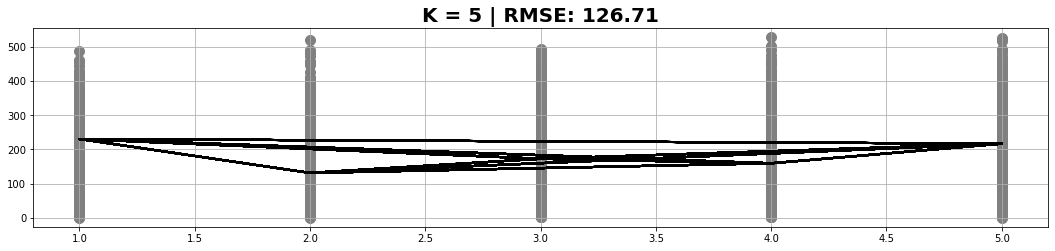

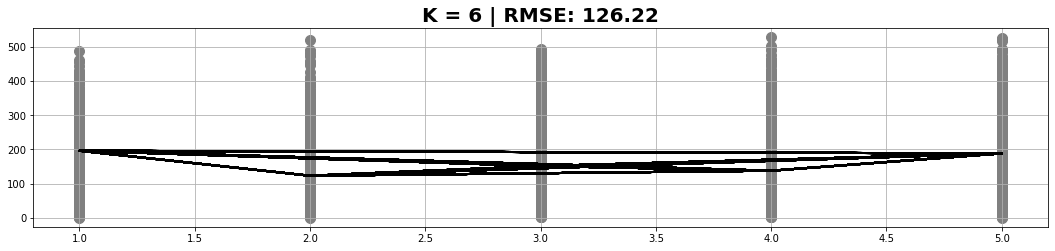

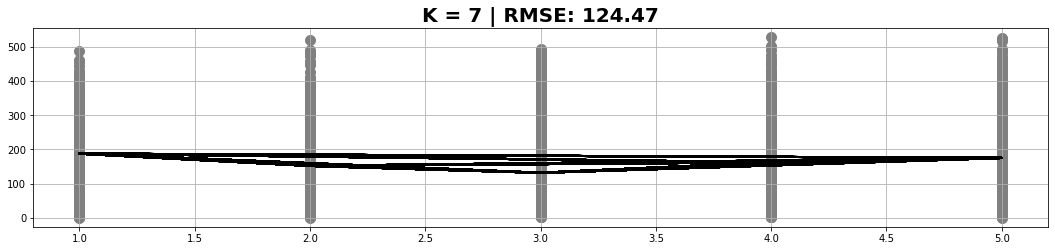

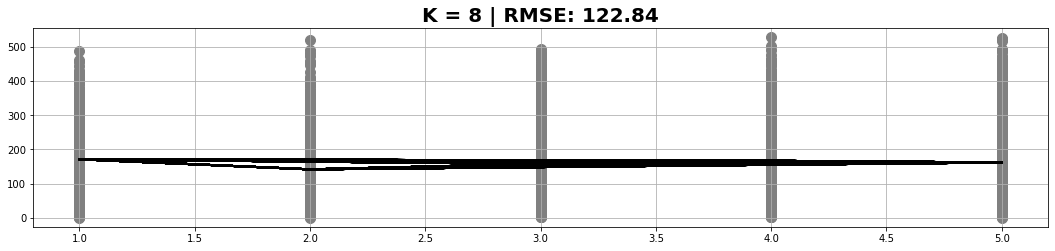

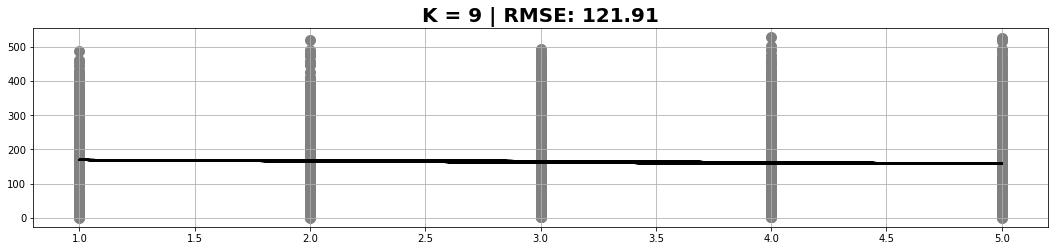

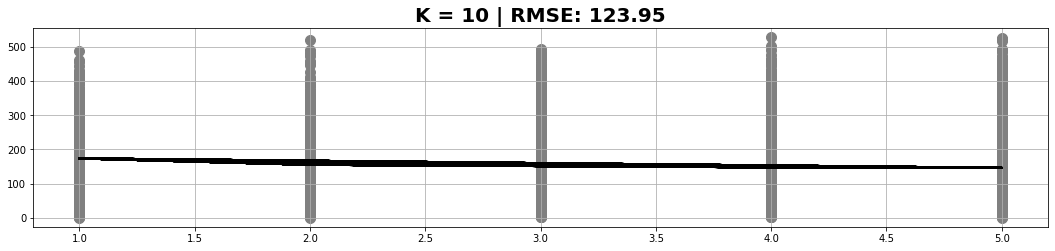

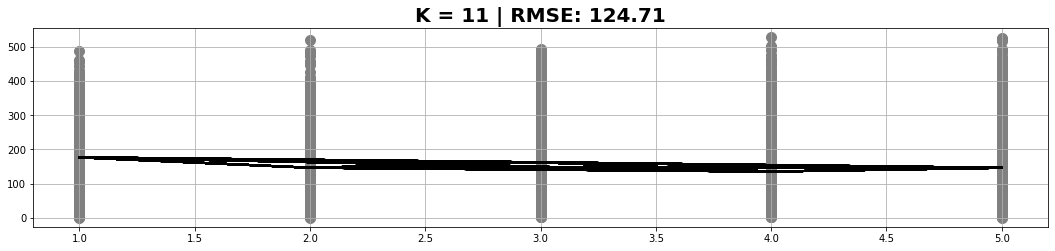

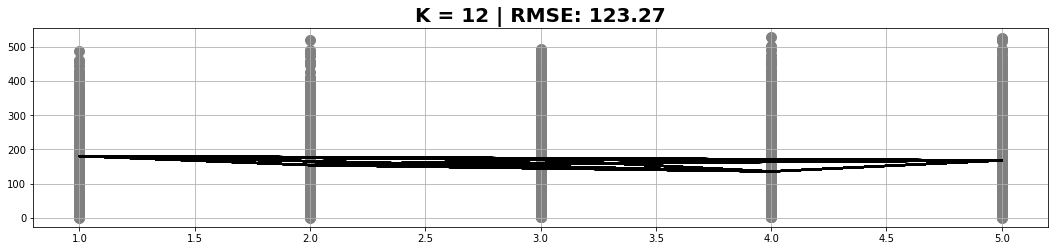

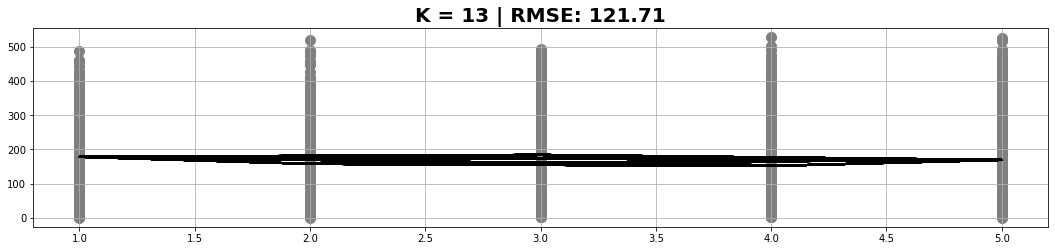

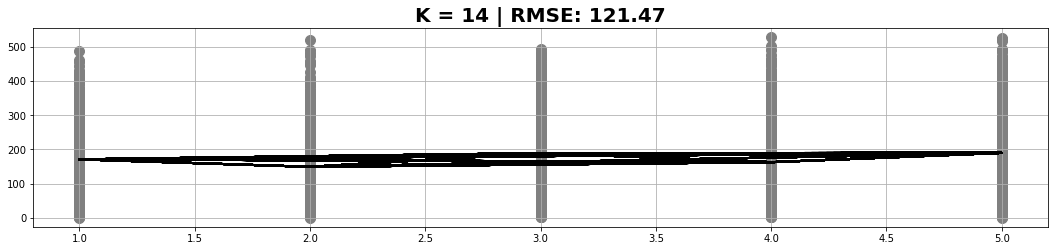

In [54]:
knn_pred_2(X_train_indpop, y_train, X_test_indpop, y_test, 'ind_pop_cid' )

perc_pol:

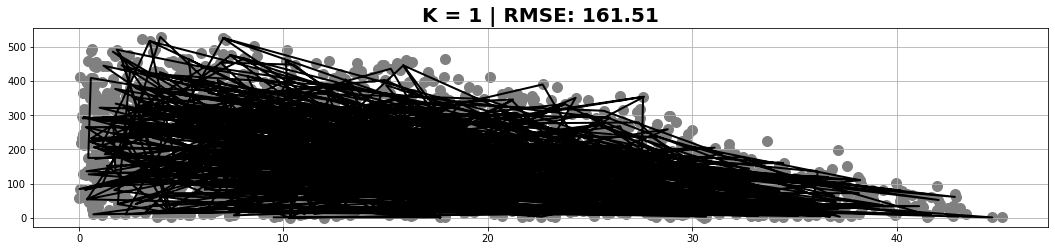

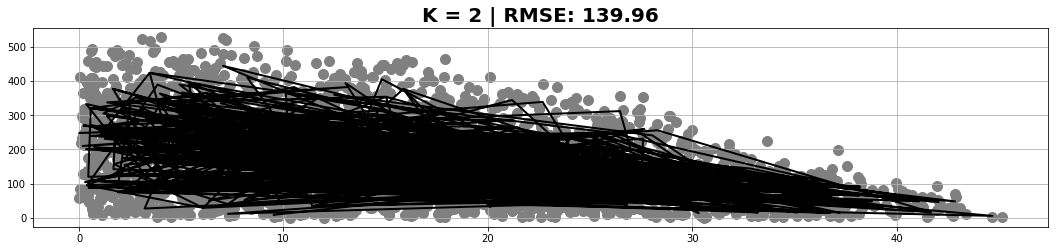

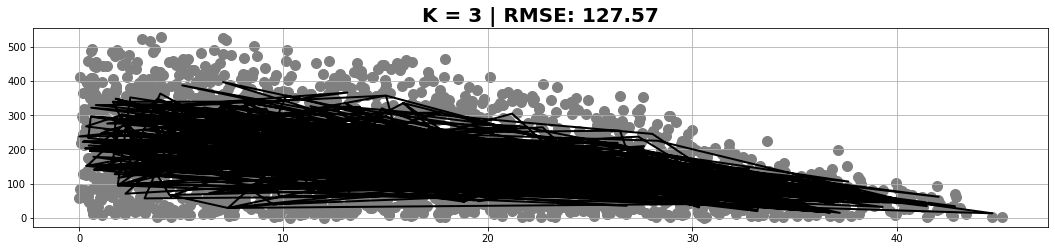

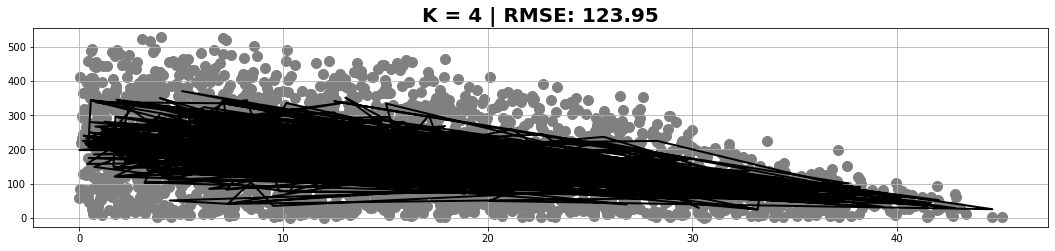

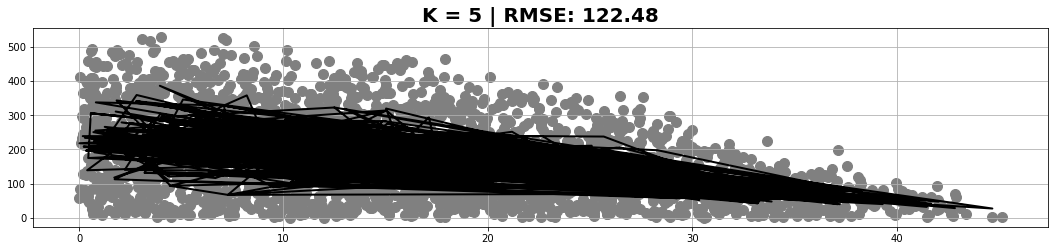

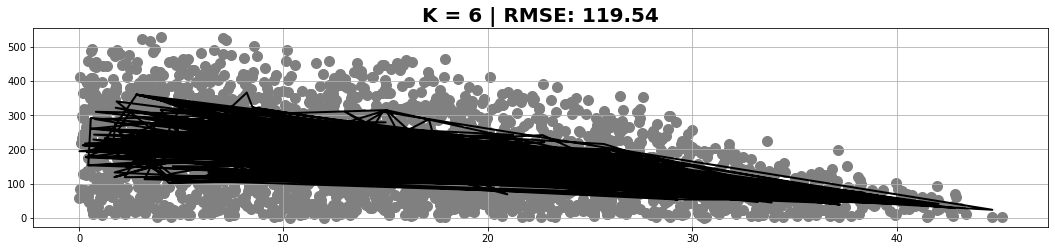

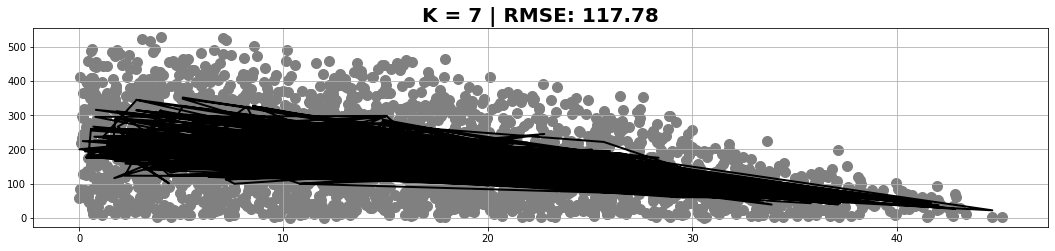

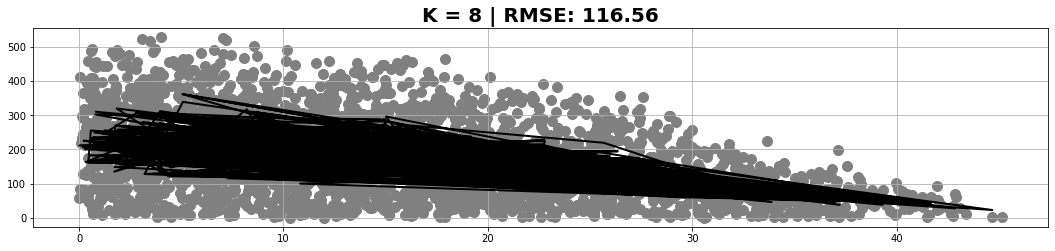

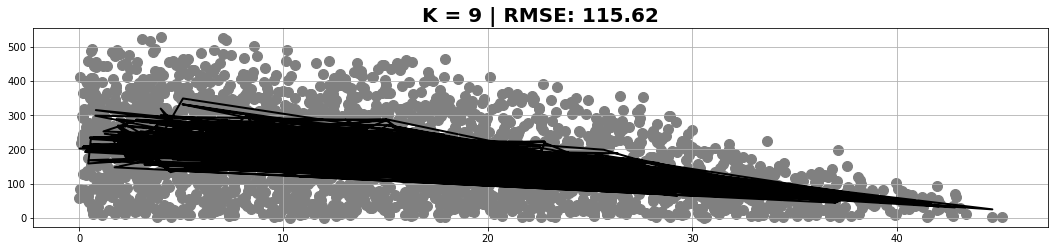

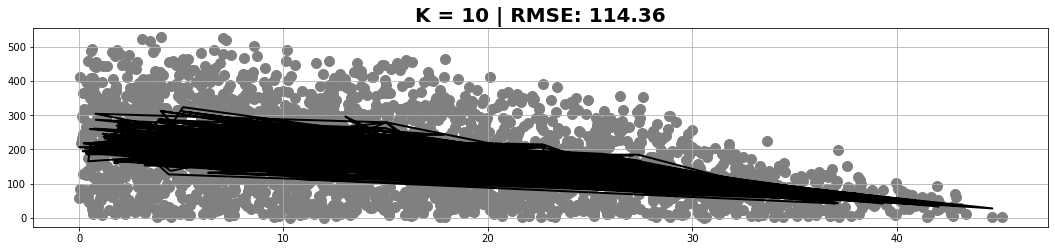

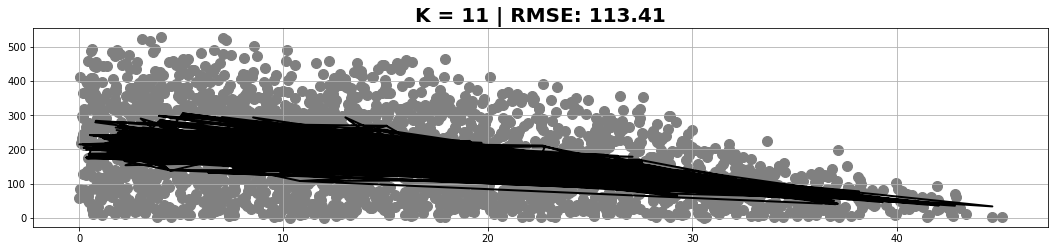

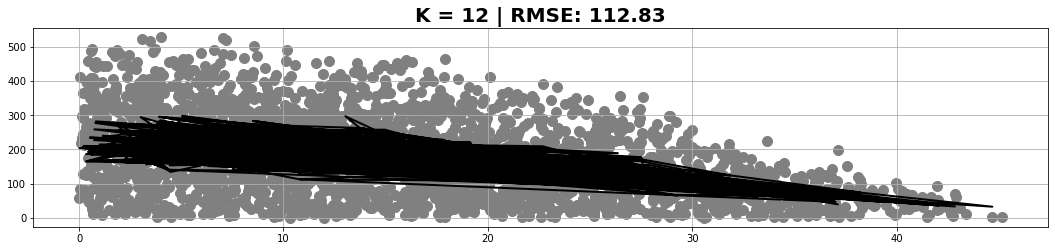

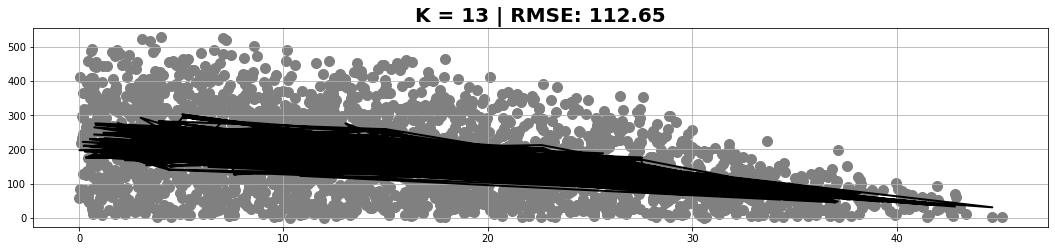

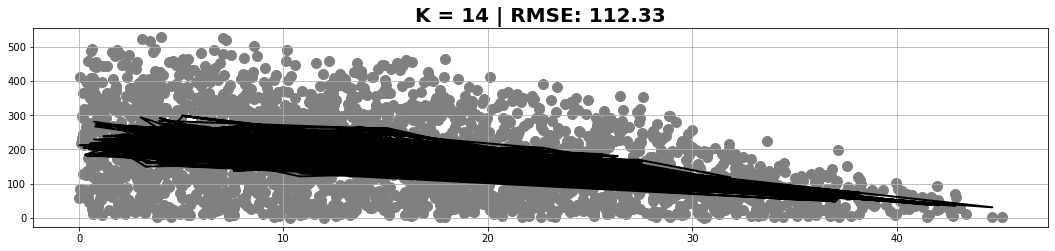

In [55]:
knn_pred_2(X_train_percpol, y_train, X_test_percpol, y_test, 'perc_pol')

nivel_ed:

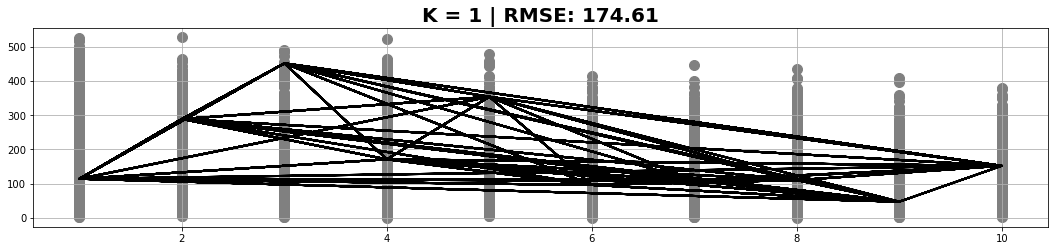

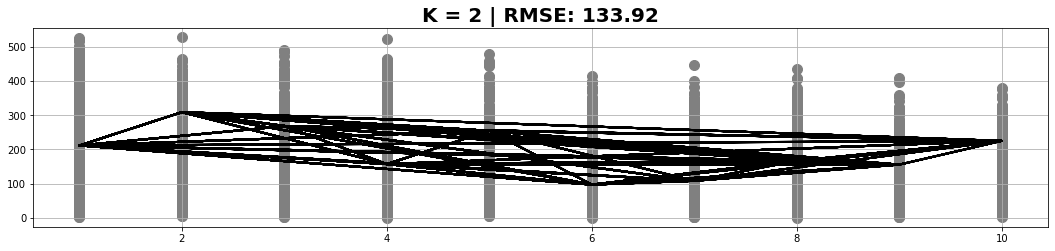

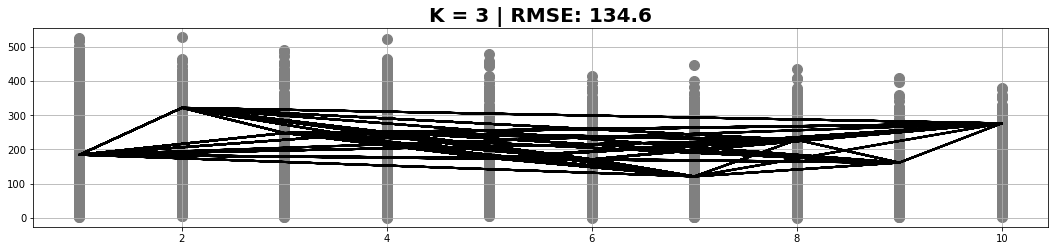

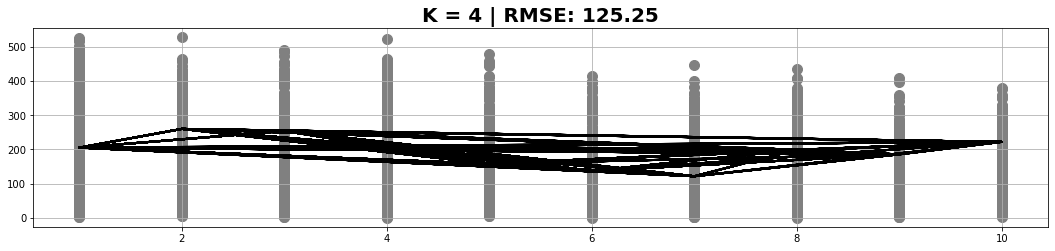

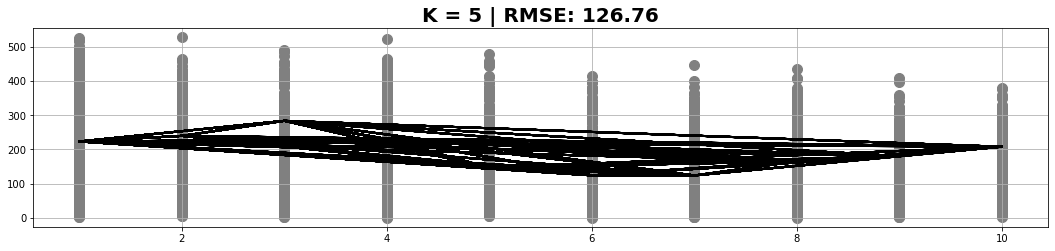

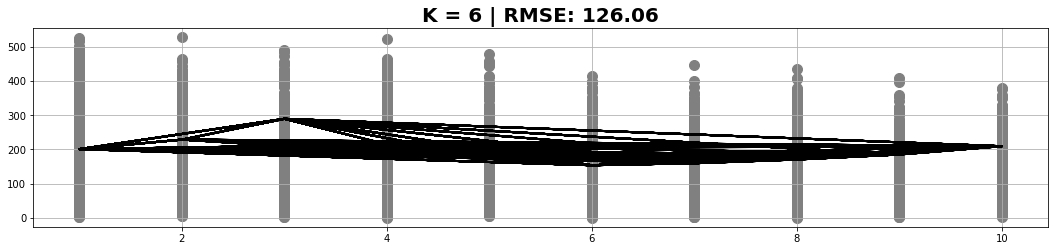

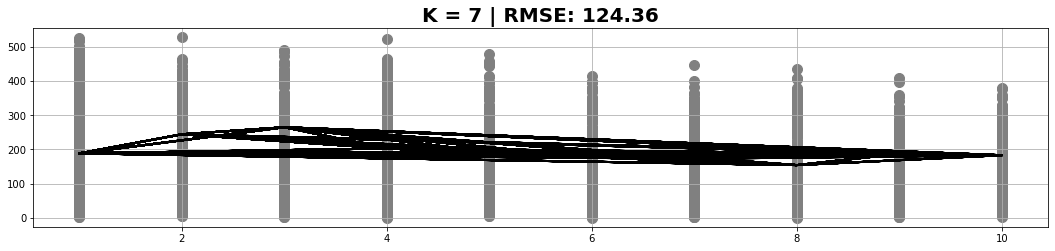

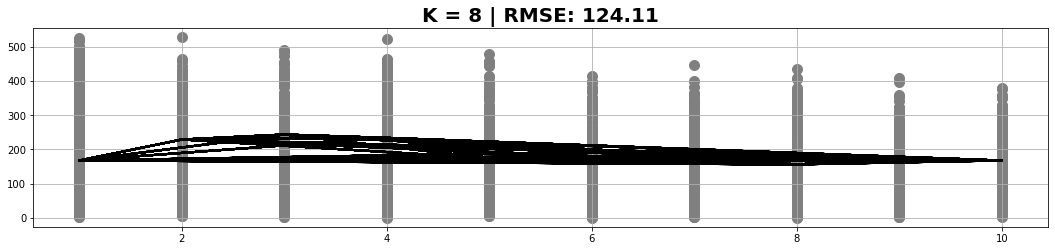

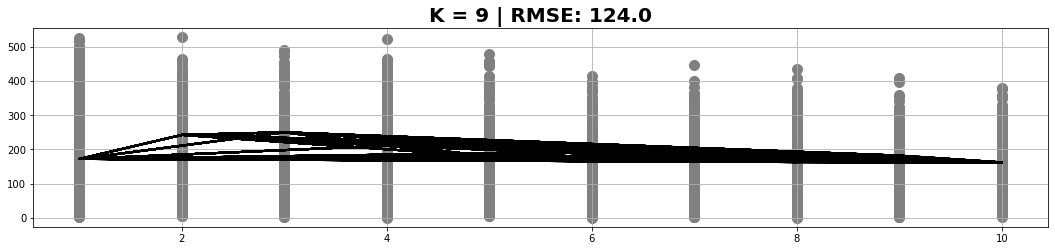

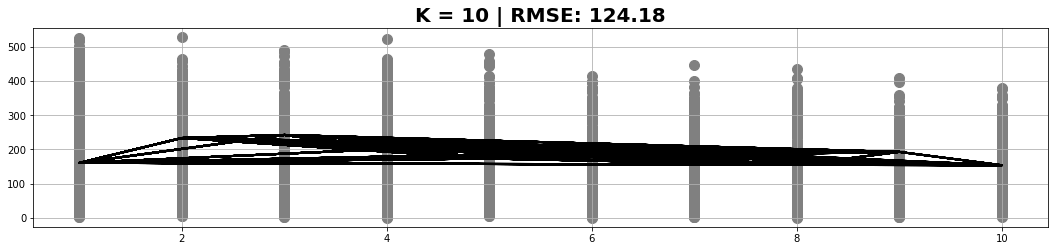

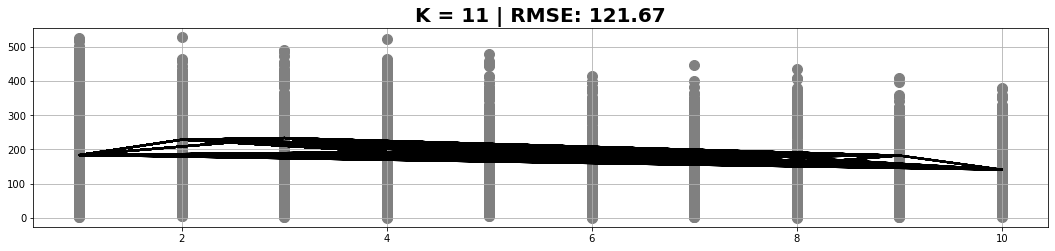

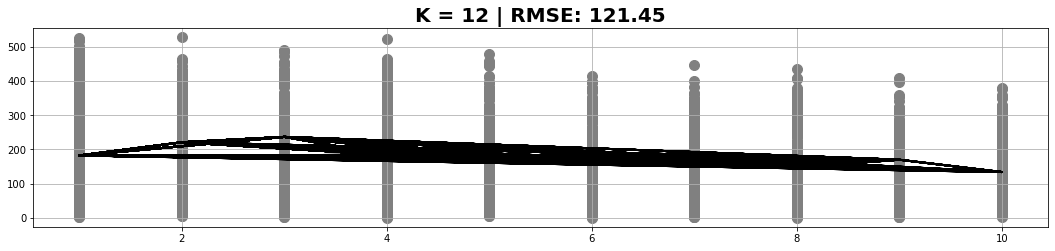

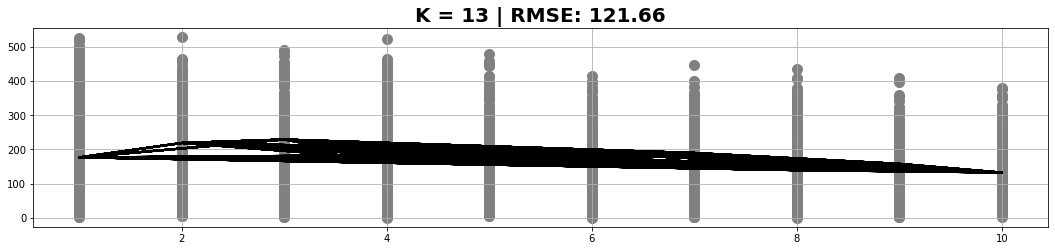

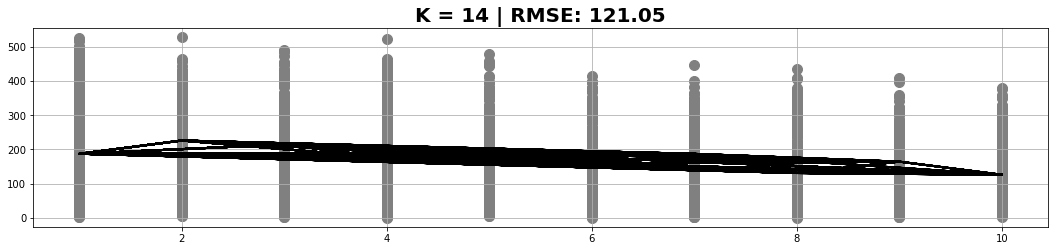

In [56]:
knn_pred_2(X_train_nivel_ed, y_train, X_test_nivel_ed, y_test, 'nivel_ed')

Comparando os Resultados, a única variável que também poderia ser usada para prever a Target, seria a 'perc_pol'. Entretanto elas possuem uma relação INVERSA. Na médida em que uma diminui ('perc_pol'), a outra aumenta ('crimes').